# **Australia Rain Prediction**

### Dự báo mưa tại Úc

*Language used: English*

*Author: Hoang Anh Tuan*

*Project type: Data Analysis - Data Science*

*Date of work: 25th October, 2023*

**Description**: This project is centered around predicting tomorrow's rain in Australia. The dataset used comprises approximately 10 years of daily weather observations from multiple locations across the country. The primary objective of this project is to develop classification models that can determine whether it will rain tomorrow (Yes or No) based on historical weather data.

**This project helps answering the questions:**
- How effective is the weather forecast methodology?
- Will it rain tomorrow?
- What would be the best way to improve the prediction?

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## **Data Import**

In [3]:
# Importing Data
link = 'https://drive.google.com/file/d/1EaRc6J0PG-fmOZlQg3Fo5o3y00_nX_QG/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
rain_df = pd.read_csv(path)

In [4]:
# First look
rain_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


**At the first glance, we can see that there are 145,460 rows and 23 columns including the target column**

Target Column (Classifier): **RainTomorrow**

##**Understanding the Dataset**

### Information

In [5]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Check duplication

In [7]:
dub = rain_df[rain_df.duplicated(keep=False)]
dub

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


**This dataset has no duplicated rows**

### Missing Values

In [8]:
# Counts
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3271
dtype: int64

In [9]:
# Percentage
missing_percentages = round((rain_df.isna().sum() / len(rain_df)) * 100, 2)
missing_percentages

Date              0.00
Location          0.00
MinTemp           1.02
MaxTemp           0.87
Rainfall          2.24
Evaporation      43.17
Sunshine         48.01
WindGustDir       7.10
WindGustSpeed     7.06
WindDir9am        7.26
WindDir3pm        2.91
WindSpeed9am      1.21
WindSpeed3pm      2.11
Humidity9am       1.82
Humidity3pm       3.10
Pressure9am      10.36
Pressure3pm      10.33
Cloud9am         38.42
Cloud3pm         40.81
Temp9am           1.21
Temp3pm           2.48
RainToday         2.24
RainTomorrow      2.25
dtype: float64

**Based on the missing value counting table, there are some assumptions I can tell:**

1. **Date and Location**: Both the "**Date**" and "**Location**" columns have no missing values, indicating that these essential data points are complete.

2. **Numeric Weather Features**: Most of the numeric weather features, such as **"MinTemp," "MaxTemp," "Rainfall," "WindSpeed9am," "WindSpeed3pm," "Humidity9am," "Humidity3pm," "Temp9am," and "Temp3pm,**" have relatively low missing value percentages (under 5%), suggesting that these features have reasonably complete data.

3. **Categorical Weather Features**: Categorical features like **"WindGustDir," "WindDir9am," "WindDir3pm," "RainToday,"** and "**RainTomorrow**" have a slightly higher missing percentage (around 7%). These columns may require some imputation or handling of missing values.

4. **Pressure and Cloud Cover**: The "**Pressure9am"** and "**Pressure3pm**" columns have missing values in excess of 10%, which indicates a significant data gap in these measurements. The "**Cloud9am**" and "**Cloud3pm**" columns also have a substantial percentage of missing data, with around 40% and 38%, respectively. This might limit their usefulness in the analysis unless imputation is applied.

5. **Sunshine and Evaporation**: "**Sunshine**" and "**Evaporation**" have a notably high percentage of missing values, with approximately 48% and 43%, respectively. These columns are missing data for nearly half of the records, which may impact their utility for analysis. Imputation or alternative data sources may be necessary for these features.

##**Exploratory Data Analysis**

### RainTomorrow based on Location

In [10]:
# For example, let's show the distribution of RainTomorrow depending on the localization
fig=px.histogram(rain_df,
                 x="RainTomorrow",
                 color="Location",
                 hover_data=rain_df.columns,
                 title="Distribution of RainTomorrow by Location",
                 barmode="group",
                )
fig.show()

### Rainfall/Sunshine and Rainfall/WinGustSpeed

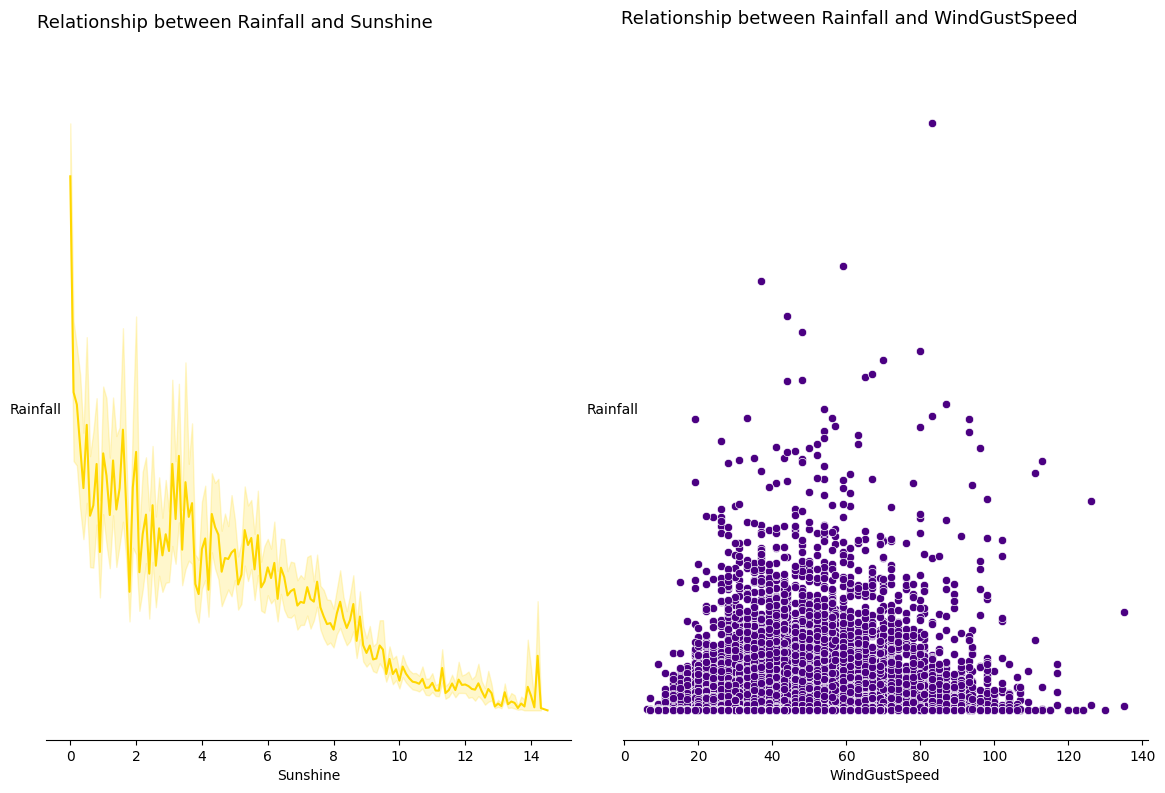

In [11]:
# Let's look at the relationship between two continuous variables
fig=plt.figure(figsize=(12,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Rainfall and Sunshine",fontsize=13,fontweight='normal')

ax[1].text(-1,430,"Relationship between Rainfall and WindGustSpeed",fontsize=13,fontweight='normal')

sns.lineplot(data=rain_df,x='Sunshine',y='Rainfall',ax=ax[0],color='#FFD700')
sns.scatterplot(data=rain_df,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='#4B0082')

for i in range(2):

    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)

    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)

plt.tight_layout()
plt.show()

### Evaporation/Sunshine and Rainfall/Cloud3mp

<Axes: xlabel='Cloud3pm', ylabel='Rainfall'>

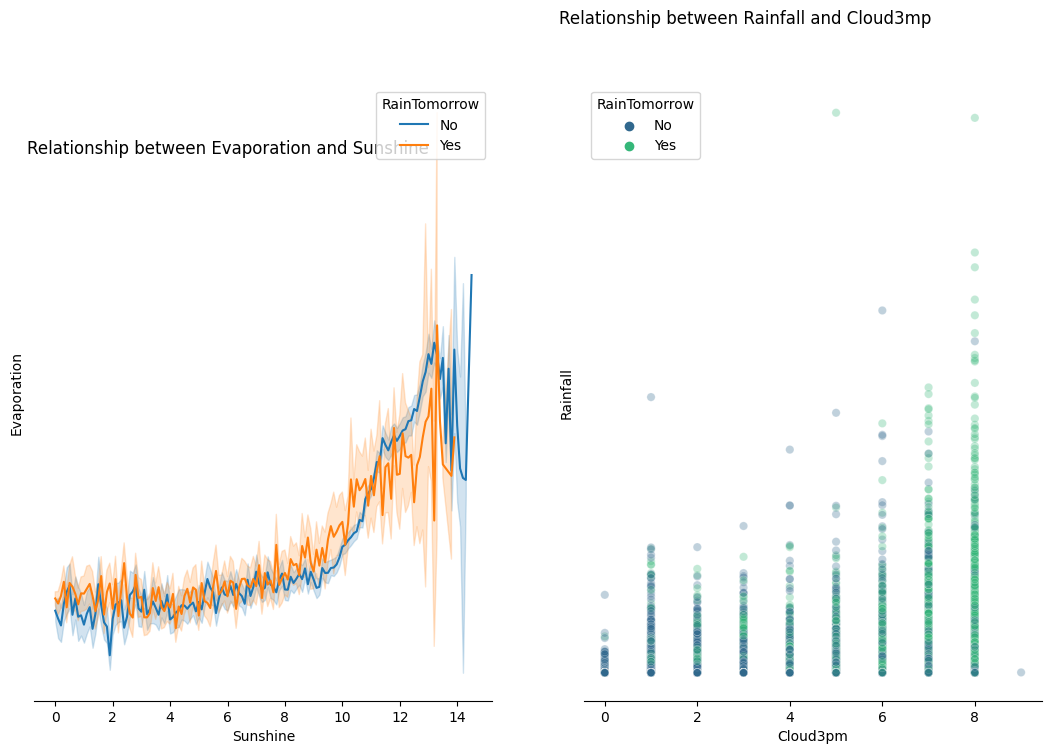

In [12]:
 fig=plt.figure(figsize=(13,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for i in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Evaporation and Sunshine",fontsize=12,fontweight='normal')

ax[1].text(-1,430,"Relationship between Rainfall and Cloud3mp",fontsize=12,fontweight='normal')


for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)

    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)

sns.lineplot(data=rain_df,x='Sunshine',y='Evaporation',ax=ax[0],hue='RainTomorrow')
sns.scatterplot(data=rain_df,x='Cloud3pm',y='Rainfall',hue='RainTomorrow',ax=ax[1],palette='viridis',markers='o',alpha=0.3)

### Distribution of Rainfall

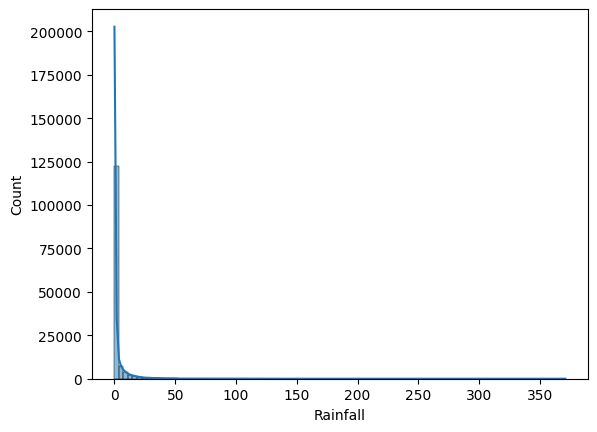

In [13]:
sns.histplot(data = rain_df, x = 'Rainfall', bins = 100, kde = True);

### Distribution of MaxTemp

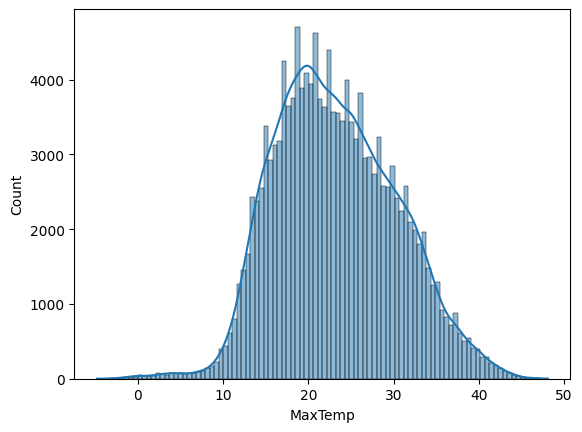

In [14]:
sns.histplot(data = rain_df, x = 'MaxTemp', bins = 100, kde = True);

### Histogram, Boxplot and Density graph for MaxTemp

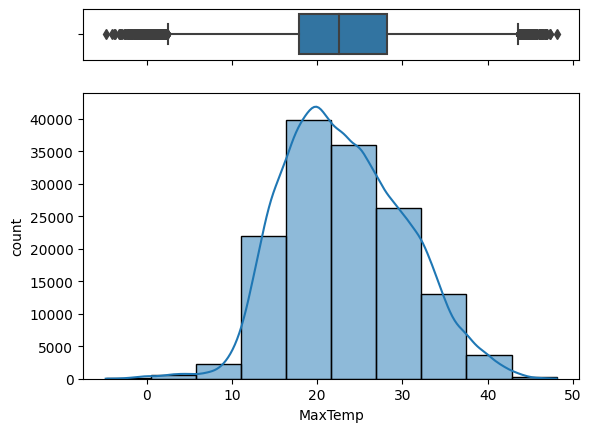

In [15]:
fig, (ax_box, ax_hist) = plt.subplots(2,
                                    sharex = True,
                                    gridspec_kw = {'height_ratios': (.15, .85)})

sns.boxplot(x = rain_df['MaxTemp'], ax = ax_box)
sns.histplot(x = rain_df['MaxTemp'], ax = ax_hist, bins = 10, kde = True)

ax_box.set(xlabel = '')
ax_hist.set(xlabel = 'MaxTemp')
ax_hist.set(ylabel = 'count')

plt.show()

### Will it rain Tomorrow?

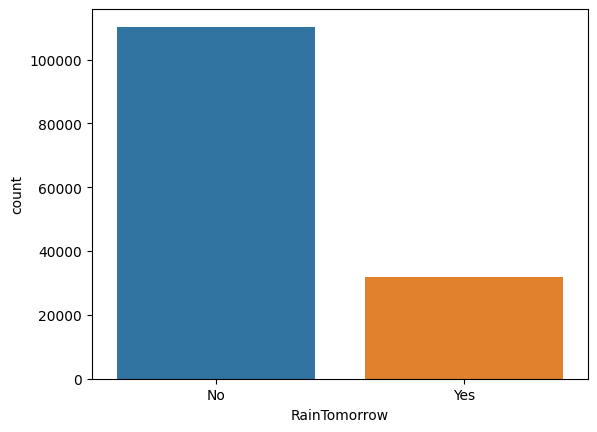

In [16]:
sns.countplot(x = 'RainTomorrow', data = rain_df);

### Will it rain tomorrow if it's raining today?

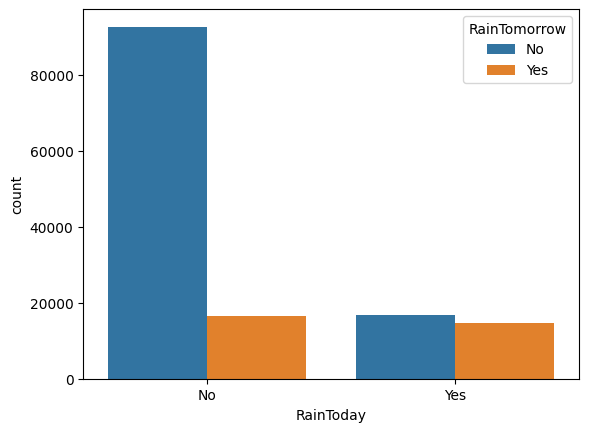

In [17]:
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = rain_df);

##**Data Cleaning and Feature Engineering**

### Ditigizing target column

In [18]:
# Check missing
rain_df['RainTomorrow'].isnull().sum()

3271

In [19]:
# Using Replace to digitize
rain_df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain_df['RainTomorrow'].replace({"No": 0, "Yes": 1}, inplace = True)

### Get a list of categorical columns

In [20]:
# Get list of categorical variables
s = (rain_df.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


**Some categorical columns found are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']**

### Handle missing values

In [21]:
# Missing values in categorical variables

for i in object_cols:
    print(i, rain_df[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228


In [22]:
# Filling missing values with mode of the column in value
for i in object_cols:
    rain_df[i].fillna(rain_df[i].mode()[0], inplace=True)

In [23]:
# Get list of numeric variables
t = (rain_df.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [24]:
for i in num_cols:
    print(i, rain_df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
RainToday 3261
RainTomorrow 3271


In [25]:
# Filling missing values with median of the column in value

for i in num_cols:
    rain_df[i].fillna(rain_df[i].median(), inplace=True)

### Ensuring that all missing values are handled

In [26]:
# Final check the missing values
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [27]:
# Let's make sure if there are missing in our data now
rain_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**The Dataset is free in missing values**

### Delete unnecessary 'Date'

In [28]:
rain_df = rain_df.drop('Date', axis=1)

### Correlation Heatmap

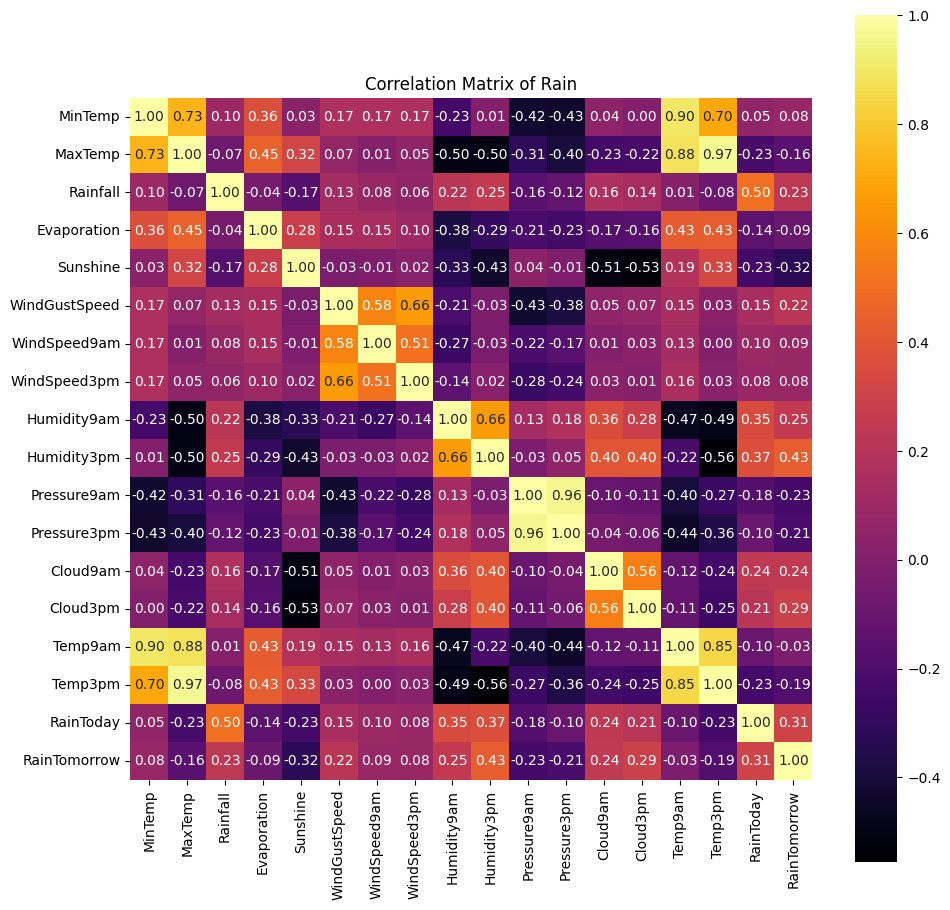

In [29]:
# Create heatmap to visualize
plt.figure(figsize=(11, 11))    # Change size of figure
# sns.set(font_scale=0.8)         # Font size
sns.heatmap(rain_df.corr(), annot=True, cmap='inferno', fmt=".2f", square=True)

# Display Plot
plt.title("Correlation Matrix of Rain")
plt.show()

**Based on the correlation heatmap, here are some assumptions:**

1. **Rainfall and wind speed are positively correlated.** This means that when rainfall is high, wind speed is also likely to be high, and vice versa. This is likely because both rainfall and wind speed are associated with weather disturbances such as storms and fronts.
2. **Rainfall and temperature are negatively correlated.** This means that when rainfall is high, temperature is likely to be low, and vice versa. This is likely because rainfall often brings cooler air from higher altitudes.
3. **Evaporation and sunshine are positively correlated.** This means that when evaporation is high, sunshine is also likely to be high, and vice versa. This is because evaporation is driven by heat from the sun.
4. **Humidity and cloudiness are positively correlated.** This means that when humidity is high, cloudiness is also likely to be high, and vice versa. This is because clouds trap water vapor, which increases humidity.
5. **Relation between 9AM and 3PM for Windspeed, Humidity, Pressure, Cloud, Temperature are strong.** For all features that split into 2 different time points, the relations are very strong, some can go up to the 0.96
6. **The target column (RainTomorrow) has some fairly strong but not too strong with all feature columns.**

### Digitizing all categorical columns

In [54]:
s = (rain_df.dtypes == "object")
object_cols = list(s[s].index)
object_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [56]:
new_df = rain_df.copy()
new_df['Location'] = label_encoder.fit_transform(new_df['Location'])
new_df['WindGustDir'] = label_encoder.fit_transform(new_df['WindGustDir'])
new_df['WindDir9am'] = label_encoder.fit_transform(new_df['WindDir9am'])
new_df['WindDir3pm'] = label_encoder.fit_transform(new_df['WindDir3pm'])

In [57]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

Now the dataset is all-numeric, which can be used for model training

##**Machine Learning Model Building**

### Choose array x and y

In [59]:
x = new_df.drop('RainTomorrow', axis=1)
y = new_df['RainTomorrow']

### Split Train/Test Set

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

### Scale

In [61]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Assign variable for models

In [86]:
log = LogisticRegression(random_state=69)
knn = KNeighborsClassifier(n_neighbors=10)
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(n_estimators=10, random_state=5)
grad = GradientBoostingClassifier(random_state=10)

### Model

In [63]:
# Create a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
]

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Classifier", "Balanced Accuracy", "Training Accuracy", "Testing Accuracy", "F1 Score", "Precision", "Recall"])

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    y_prob = clf.predict_proba(x_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_prob)
    accuracy_train = accuracy_score(y_train, clf.predict(x_train))
    accuracy_test = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results_df = results_df.append({
        "Classifier": name,
        "Balanced Accuracy": auc_score,
        "Training Accuracy": accuracy_train,
        "Testing Accuracy": accuracy_test,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    }, ignore_index=True)

# Sort the DataFrame by Balanced Accuracy in descending order
results_df = results_df.sort_values(by="Balanced Accuracy", ascending=False)

# Print the results table with styling
styled_results = results_df.style.background_gradient(cmap='Blues', subset=["Balanced Accuracy", "Training Accuracy", "Testing Accuracy", "F1 Score", "Precision", "Recall"])
styled_results = styled_results.hide_index()

# print(styled_results)

In [64]:
styled_results

Classifier,Balanced Accuracy,Training Accuracy,Testing Accuracy,F1 Score,Precision,Recall
Random Forest,0.878309,0.999918,0.853293,0.595925,0.751193,0.493849
Gradient Boosting,0.866300,0.852908,0.848178,0.582407,0.732636,0.483304
Logistic Regression,0.856983,0.844952,0.840863,0.563212,0.706228,0.468366
K-Nearest Neighbors,0.812493,0.881039,0.830799,0.550515,0.658396,0.473010
Decision Tree,0.685404,0.999927,0.781933,0.508003,0.502208,0.513934


- **Random Forest** is the most accurate model, with a balanced accuracy of 0.878309.
- **Gradient Boosting** is the second most accurate model, with a balanced accuracy of 0.866300.
- **Logistic Regression** and **K-Nearest Neighbors** are also relatively accurate models, with balanced accuracies of 0.856983 and 0.812493, respectively.
- **Decision Tree** is the least accurate model, with a balanced accuracy of 0.685404.

### Model 1: Random Forest

##### *Prediction*

In [79]:
# Training model
start_forest = time.time()
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(x_train, y_train)

# Make prediction
y_pred_forest = model.predict(x_test)
end_forest = time.time()

##### *Classification Report*

In [105]:
# Classification Report
performance_forest = end_forest - start_forest # Calculate the time performance
classification_forest = classification_report(y_test, y_pred_forest, target_names=['No Rain', 'Rain'])
report_forest = classification_report(y_test, y_pred_forest, output_dict=True)

print(classification_forest)
print()
print("Time consumed: ", round(performance_forest, 3), "seconds")

              precision    recall  f1-score   support

     No Rain       0.82      0.98      0.90     28399
        Rain       0.79      0.25      0.38      7966

    accuracy                           0.82     36365
   macro avg       0.81      0.61      0.64     36365
weighted avg       0.82      0.82      0.78     36365


Time consumed:  6.354 seconds


##### *Confusion Matrix*

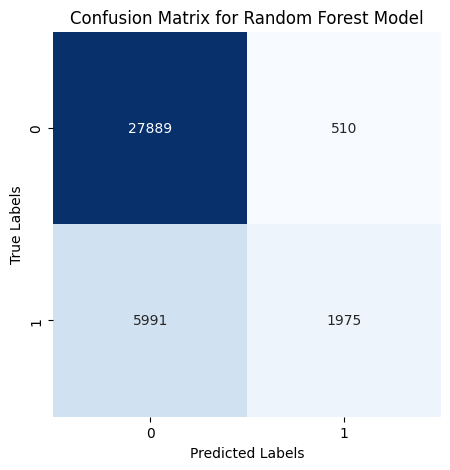


NO RAIN - 0 /RAIN - 1


In [81]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Show categories
print()
print("NO RAIN - 0 /RAIN - 1")

##### *ROC Curve*

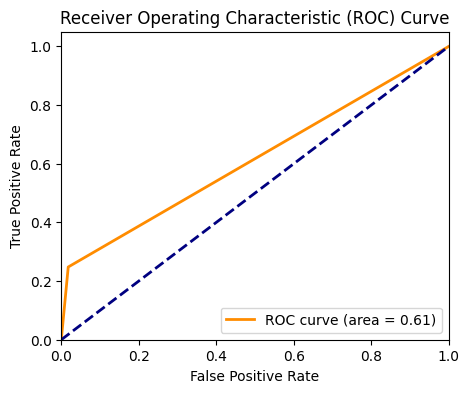

In [82]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_forest)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model 2: Gradient Boosting

##### *Prediction*

In [74]:
# Training model
start_grad = time.time()
grad.fit(x_train, y_train)

# Make prediction
y_pred_grad = grad.predict(x_test)
end_grad = time.time()

##### *Classification Report*

In [75]:
# Classification Report
performance_grad = end_grad - start_grad # Calculate the time performance
classification_grad = classification_report(y_test, y_pred_grad, target_names=['No Rain', 'Rain'])
report_grad = classification_report(y_test, y_pred_grad, output_dict=True)

print(classification_grad)
print()
print("Time consumed: ", round(performance_grad, 3), "seconds")

              precision    recall  f1-score   support

     No Rain       0.87      0.95      0.91     28399
        Rain       0.73      0.48      0.58      7966

    accuracy                           0.85     36365
   macro avg       0.80      0.72      0.74     36365
weighted avg       0.84      0.85      0.84     36365


Time consumed:  45.641 seconds


##### *Confusion Matrix*

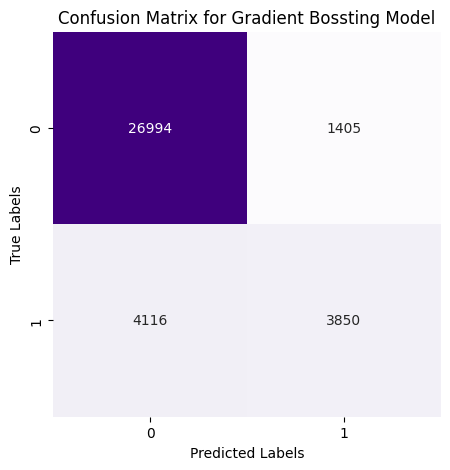


NO RAIN - 0 / RAIN - 1


In [78]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_grad)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gradient Bossting Model')
plt.show()

# Show categories
print()
print("NO RAIN - 0 / RAIN - 1")

##### *ROC Curve*

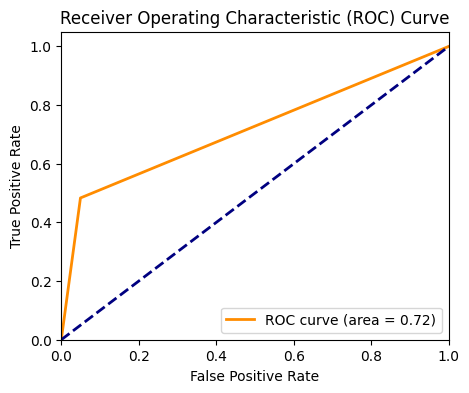

In [76]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grad)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model 3: Logistic Regression

##### *Prediction*

In [87]:
# Training model
start_log = time.time()
log.fit(x_train, y_train)

# Make prediction
y_pred_log = log.predict(x_test)
end_log = time.time()

##### *Classification Report*

In [88]:
# Classification Report
performance_log = end_log - start_log # Calculate the time performance
classification_log = classification_report(y_test, y_pred_log, target_names=['No Rain', 'Rain'])
report_log = classification_report(y_test, y_pred_log, output_dict=True)

print(classification_log)
print()
print("Time consumed: ", round(performance_log, 3), "seconds")

              precision    recall  f1-score   support

     No Rain       0.86      0.95      0.90     28399
        Rain       0.71      0.47      0.56      7966

    accuracy                           0.84     36365
   macro avg       0.78      0.71      0.73     36365
weighted avg       0.83      0.84      0.83     36365


Time consumed:  0.476 seconds


##### *Confusion Matrix*

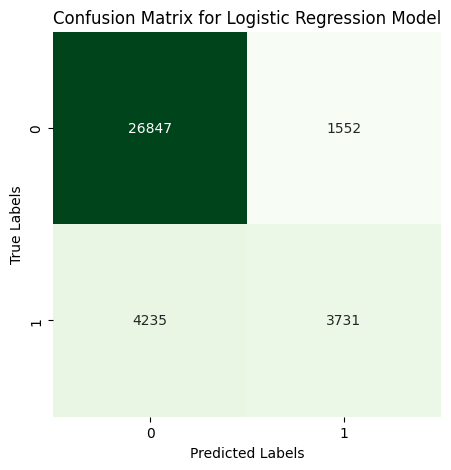


NO RAIN - 0 /RAIN - 1


In [95]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# Show categories
print()
print("NO RAIN - 0 /RAIN - 1")

##### *ROC Curve*

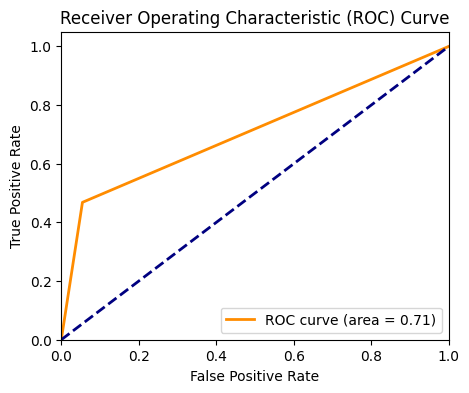

In [90]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model 4: K-Nearest Neighbours

##### *Prediction*

In [91]:
# Training model
start_knn = time.time()
knn.fit(x_train, y_train)

# Make prediction
y_pred_knn = knn.predict(x_test)
end_knn = time.time()

##### *Classification Report*

In [92]:
# Classification Report
performance_knn = end_knn - start_knn # Calculate the time performance
classification_knn = classification_report(y_test, y_pred_knn, target_names=['No Rain', 'Rain'])
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

print(classification_knn)
print()
print("Time consumed: ", round(performance_knn, 3), "seconds")

              precision    recall  f1-score   support

     No Rain       0.85      0.96      0.90     28399
        Rain       0.73      0.41      0.52      7966

    accuracy                           0.84     36365
   macro avg       0.79      0.68      0.71     36365
weighted avg       0.83      0.84      0.82     36365


Time consumed:  34.807 seconds


##### *Confusion Matrix*

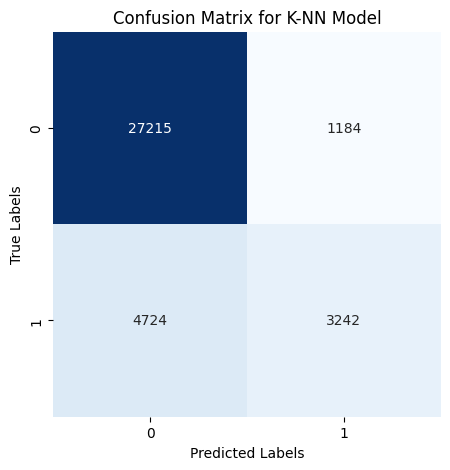


NO RAIN - 0 /RAIN - 1


In [93]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for K-NN Model')
plt.show()

# Show categories
print()
print("NO RAIN - 0 /RAIN - 1")

##### *ROC Curve*

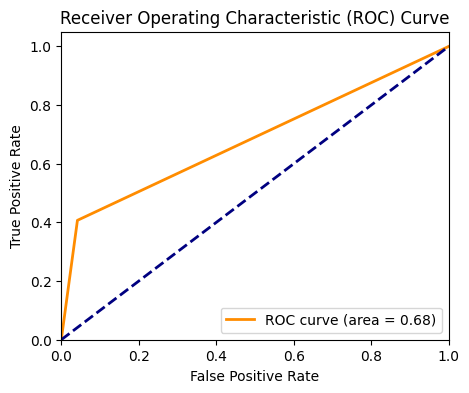

In [94]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Model 5: Decision Tree

##### *Prediction*

In [96]:
# Training model
start_tree = time.time()
tree.fit(x_train, y_train)

# Make prediction
y_pred_tree = tree.predict(x_test)
end_tree = time.time()

##### *Classification Report*

In [97]:
# Classification Report
performance_tree = end_tree - start_tree # Calculate the time performance
classification_tree = classification_report(y_test, y_pred_tree, target_names=['No Rain', 'Rain'])
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)

print(classification_tree)
print()
print("Time consumed: ", round(performance_tree, 3), "seconds")

              precision    recall  f1-score   support

     No Rain       0.86      0.86      0.86     28399
        Rain       0.50      0.51      0.51      7966

    accuracy                           0.78     36365
   macro avg       0.68      0.68      0.68     36365
weighted avg       0.78      0.78      0.78     36365


Time consumed:  2.928 seconds


##### *Confusion Matrix*

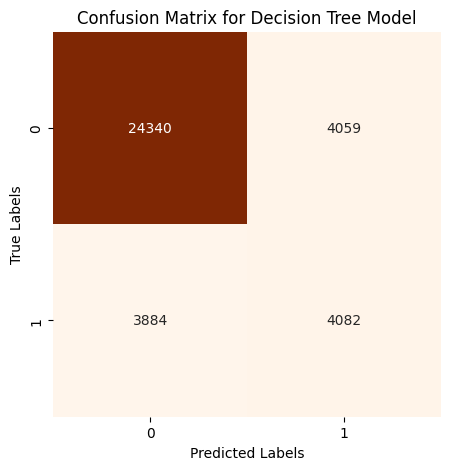


NO RAIN - 0 /RAIN - 1


In [98]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

# Show categories
print()
print("NO RAIN - 0 /RAIN - 1")

##### *ROC Curve*

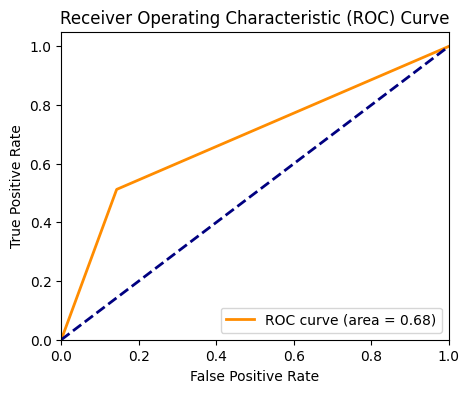

In [100]:
# Assigning
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##**Model Evaluation**

### Build a table for comparison

In [122]:
model_header = ['Model', 'Precision', 'Recall', 'F1-score', 'Accuracy', 'Time Performance']
model_forest_0 = ['Random Forest - No Rain', report_forest['0.0']['precision'], report_forest['0.0']['recall'], report_forest['0.0']['f1-score'], report_forest['accuracy'], performance_forest]
model_forest_1 = ['Random Forest - Rain', report_forest['1.0']['precision'], report_forest['1.0']['recall'], report_forest['1.0']['f1-score'], report_forest['accuracy'], performance_forest]
model_grad_0 = ['Gradient Boosting - No Rain', report_grad['0.0']['precision'], report_grad['0.0']['recall'], report_grad['0.0']['f1-score'], report_grad['accuracy'], performance_grad]
model_grad_1 = ['Gradient Boosting - Rain', report_grad['1.0']['precision'], report_grad['1.0']['recall'], report_grad['1.0']['f1-score'], report_grad['accuracy'], performance_grad]
model_log_0 = ['Logistic Regression - No Rain', report_log['0.0']['precision'], report_log['0.0']['recall'], report_log['0.0']['f1-score'], report_log['accuracy'], performance_log]
model_log_1 = ['Logistic Regression - Rain', report_log['1.0']['precision'], report_log['1.0']['recall'], report_log['1.0']['f1-score'], report_log['accuracy'], performance_log]
model_knn_0 = ['K-Nearest Neighbors - No Rain', report_knn['0.0']['precision'], report_knn['0.0']['recall'], report_knn['0.0']['f1-score'], report_knn['accuracy'], performance_knn]
model_knn_1 = ['K-Nearest Neighbors - Rain', report_knn['1.0']['precision'], report_knn['1.0']['recall'], report_knn['1.0']['f1-score'], report_knn['accuracy'], performance_knn]
model_tree_0 = ['Decision Tree - No Rain', report_tree['0.0']['precision'], report_tree['0.0']['recall'], report_tree['0.0']['f1-score'], report_tree['accuracy'], performance_tree]
model_tree_1 = ['Decision Tree - Rain', report_tree['1.0']['precision'], report_tree['1.0']['recall'], report_tree['1.0']['f1-score'], report_tree['accuracy'], performance_tree]

model_data = [model_header, model_forest_0, model_forest_1, model_grad_0, model_grad_1, model_log_0, model_log_1, model_knn_0, model_knn_1, model_tree_0, model_tree_1]
model_df = pd.DataFrame(model_data)
# model_df.columns = model_df.iloc[0]
# model_df = model_df.drop(0)
# model_df = model_df.reset_index(drop=True)

In [111]:
model_df

,0,1,2,3,4,5
0,,Precision,Recall,F1-score,Accuracy,Time Performance
1,Random Forest - No Rain,0.82317,0.982042,0.895615,0.821229,6.353558
2,Random Forest - Rain,0.794769,0.247929,0.377954,0.821229,6.353558
3,Gradient Boosting - No Rain,0.867695,0.950526,0.907224,0.848178,45.641112
4,Gradient Boosting - Rain,0.732636,0.483304,0.582407,0.848178,45.641112
5,Logistic Regression - No Rain,0.863748,0.94535,0.902708,0.840863,0.475868
6,Logistic Regression - Rain,0.706228,0.468366,0.563212,0.840863,0.475868
7,K-Nearest Neighbors - No Rain,0.852093,0.958308,0.902085,0.837536,34.807023
8,K-Nearest Neighbors - Rain,0.73249,0.40698,0.523241,0.837536,34.807023
9,Decision Tree - No Rain,0.862387,0.857072,0.859721,0.781576,2.928375


In [125]:
selected_rows = model_df[model_df.index.isin([1, 3, 5, 7, 9])]
selected_rows

,0,1,2,3,4,5
1,Random Forest - No Rain,0.82317,0.982042,0.895615,0.821229,6.353558
3,Gradient Boosting - No Rain,0.867695,0.950526,0.907224,0.848178,45.641112
5,Logistic Regression - No Rain,0.863748,0.94535,0.902708,0.840863,0.475868
7,K-Nearest Neighbors - No Rain,0.852093,0.958308,0.902085,0.837536,34.807023
9,Decision Tree - No Rain,0.862387,0.857072,0.859721,0.781576,2.928375


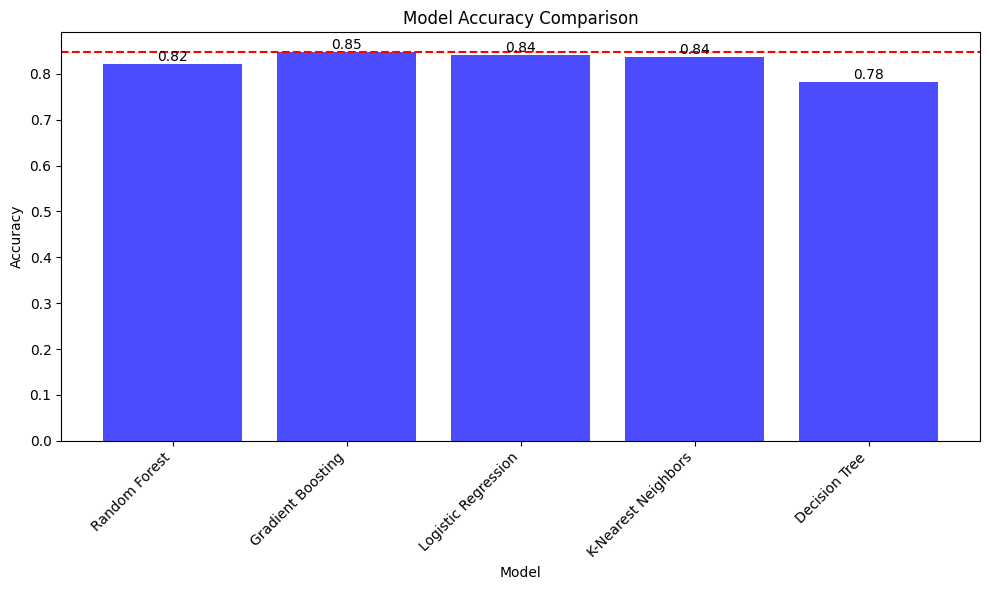

In [130]:
# Extract the model names and accuracy values from the selected rows
model_names = selected_rows[0].str.replace(' - No Rain', '')
accuracy_values = selected_rows[4].astype(float)

# Determine the model with the highest accuracy
highest_accuracy_model = model_names[accuracy_values.idxmax()]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar chart for Accuracy
bars = plt.bar(model_names, accuracy_values, alpha=0.7, color='blue')

# Add accuracy values as text on top of the bars
for bar, accuracy in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', ha='center', va='bottom')

# Create a horizontal red dotted line for the highest accuracy
for bar, model in zip(bars, model_names):
    if model == highest_accuracy_model:
        plt.axhline(y=accuracy_values.max(), color='red', linestyle='--')

# Customize the chart appearance
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")

# Show the chart
plt.tight_layout()
plt.show()